In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='anatar', api_key='GzHwMu8P9KCQCL6pIYnh')
import plotly.plotly as py
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
df = pd.read_csv("data/NCHS_-_Leading_Causes_of_Death__United_States.csv")
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7


In [3]:
#Group by state
criteria_2000 = (df['State'] != 'United States') & (df['Year'] == 2002)
criteria1 = (df['State'] != 'United States')
dr = df[criteria1]
death_rates_2000 = df[criteria_2000]

In [4]:
dr_2000 = (death_rates_2000.groupby('State')
 .agg({'Age-adjusted Death Rate': 'sum'})
 .reset_index()
 .rename(columns={'Age-adjusted Death Rate':'Cumulative Death Rate'})
)
dr_2000


,State,Cumulative Death Rate
0,Alabama,1860.8
1,Alaska,1442.3
2,Arizona,1493.5
3,Arkansas,1800.6
4,California,1433.3
5,Colorado,1451.3
6,Connecticut,1405.9
7,Delaware,1555.9
8,District of Columbia,1847.7
9,Florida,1457.8


In [5]:
#State Names to State Code Translation
states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

dr_2000['State_Code'] = dr_2000['State'].map(states)
dr_2000


,State,Cumulative Death Rate,State_Code
0,Alabama,1860.8,AL
1,Alaska,1442.3,AK
2,Arizona,1493.5,AZ
3,Arkansas,1800.6,AR
4,California,1433.3,CA
5,Colorado,1451.3,CO
6,Connecticut,1405.9,CT
7,Delaware,1555.9,DE
8,District of Columbia,1847.7,DC
9,Florida,1457.8,FL


In [6]:

#scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

scl = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'],
        [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'],
        [0.6666666666666666, 'rgb(171,217,233)'],[0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = dr_2000['State_Code'],
        z = dr_2000['Cumulative Death Rate'].astype(float),
        locationmode = 'USA-states',
        text = dr_2000['Cumulative Death Rate'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Death Rate by State")
        ) ]
layout = dict(
        title = 'Death Rate by State in 2000)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig)

In [7]:
dr['State_Code'] = dr['State'].map(states)
drr = dr.groupby(['Year','State_Code'], as_index=False)['Age-adjusted Death Rate'].sum()
drr.head()

/Users/AP/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Year,State_Code,Age-adjusted Death Rate
0,1999,AK,1523.2
1,1999,AL,1859.7
2,1999,AR,1788.9
3,1999,AZ,1514.5
4,1999,CA,1492.7


In [8]:
drr_pivot=drr.pivot(index='State_Code', columns='Year', values='Age-adjusted Death Rate')

In [9]:
import cufflinks as cf
import numpy as np

drr_pivot.iplot()


In [10]:
df_11 = pd.read_csv("data/11.csv")
df_11.head()

,record,age,race,sex,ms,hisp,adjinc,educ,pob,wt,...,tenure,citizen,health,indalg,smok100,agesmk,smokstat,smokhome,curruse,everuse
0,88426,70,1.0,2,5.0,3.0,11.0,4.0,909,151,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,88427,79,1.0,2,2.0,3.0,11.0,4.0,909,132,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,88428,34,1.0,1,1.0,3.0,8.0,4.0,909,155,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,88429,32,1.0,2,1.0,3.0,8.0,1.0,909,155,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,88430,2,1.0,2,NaN,3.0,8.0,NaN,909,145,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(df_11.columns)
df_11.describe(include='all')

Index(['record', 'age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob',
       'wt', 'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind',
       'esr', 'urban', 'smsast', 'inddea', 'cause113', 'follow', 'dayod',
       'hosp', 'hospd', 'ssnyn', 'vt', 'histatus', 'hitype', 'povpct',
       'stater', 'rcow', 'tenure', 'citizen', 'health', 'indalg', 'smok100',
       'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse'],
      dtype='object')


,record,age,race,sex,ms,hisp,adjinc,educ,pob,wt,...,tenure,citizen,health,indalg,smok100,agesmk,smokstat,smokhome,curruse,everuse
count,1.835072e+06,1.835072e+06,1.832182e+06,1.835072e+06,1.473846e+06,1.782570e+06,1.790803e+06,1.484202e+06,1.835072e+06,1.835072e+06,...,1.809625e+06,464861.000000,384129.000000,348759.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.175365e+05,3.519179e+01,1.200926e+00,1.520119e+00,2.285090e+00,2.832209e+00,8.341216e+00,8.298870e+00,8.231537e+02,1.328667e+02,...,1.323610e+00,1.428692,2.132703,0.864296,NaN,NaN,NaN,NaN,NaN,NaN
std,5.297398e+05,2.168287e+01,5.966862e-01,4.995952e-01,1.710528e+00,5.158042e-01,3.759222e+00,2.884951e+00,2.843290e+02,7.247297e+01,...,5.062290e-01,1.169147,1.088281,0.342474,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.587688e+05,1.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,9.090000e+02,7.600000e+01,...,1.000000e+00,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.175365e+05,3.300000e+01,1.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00,8.000000e+00,9.260000e+02,1.340000e+02,...,1.000000e+00,1.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.376304e+06,5.100000e+01,1.000000e+00,2.000000e+00,5.000000e+00,3.000000e+00,1.200000e+01,1.100000e+01,9.390000e+02,1.790000e+02,...,2.000000e+00,1.000000,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1.835072e+06,9.000000e+01,5.000000e+00,2.000000e+00,5.000000e+00,3.000000e+00,1.400000e+01,1.400000e+01,9.560000e+02,1.522000e+03,...,3.000000e+00,5.000000,5.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Feature Engineering
#Drop the following features from consideration - 1st cut
first_cut_df = df_11.drop(columns=['record','follow', 'dayod',
       'hosp', 'hospd', 'rcow', 'citizen', 'health', 'indalg', 'smok100',
       'agesmk', 'smokstat', 'smokhome', 'curruse', 'everuse'])




In [13]:
#Change feature sex to 1 and 0 and add a new feature called isMale and int64
sexvals = {1:1, 2:0}
first_cut_df['isMale'] = first_cut_df['sex'].map(sexvals)
first_cut_df.groupby(['isMale'])['isMale'].count()

isMale
0    954455
1    880617
Name: isMale, dtype: int64

In [14]:

#Ignored for now
#Health insurance Yes, No and Unknown 
#hivals = {1.0:'HI_Yes', 0.0:'HI_No', 'NaN':"HI_Unknown"}
#first_cut_df['HealthInsurance'] = first_cut_df['histatus'].map(hivals).fillna('HI_Unknown')
first_cut_df.groupby(['histatus'])['histatus'].count()

histatus
0.0     202642
1.0    1054665
Name: histatus, dtype: int64

In [15]:
#Veteran Status is coded 1|0 and int64
first_cut_df.groupby(['vt'])['vt'].count()

vt
0.0    1226547
1.0     212474
Name: vt, dtype: int64

In [16]:
#Veteran Status is coded 1|0  and int64
first_cut_df.groupby(['ssnyn'])['ssnyn'].count()

ssnyn
0     758586
1    1076486
Name: ssnyn, dtype: int64

In [17]:
#Create new categorical variable Age_Bins
first_cut_df['Age_Bins'] = pd.cut(first_cut_df['age'], [0, 17, 21, 30,45,55,65,75,85,90], labels=['Child', '18-21', '22-30','31-45','46-55','56-65','66-75','76-85','Above 85'])
first_cut_df.groupby(['Age_Bins'])['Age_Bins'].count()

Age_Bins
Child       427017
18-21       116602
22-30       279713
31-45       414170
46-55       200867
56-65       169671
66-75       127810
76-85        62348
Above 85     13326
Name: Age_Bins, dtype: int64

In [18]:
#Create new categorical variable Education_Bins
first_cut_df['Education_Bins'] = pd.cut(first_cut_df['educ'], [0, 4, 7, 8,11,100], labels=[1, 2, 3,4,5])
first_cut_df.groupby(['Education_Bins'])['Education_Bins'].count()

Education_Bins
1    188852
2    249392
3    517831
4    281261
5    246866
Name: Education_Bins, dtype: int64

In [19]:
#Change POB to World Region Categorical Variable
#sexvals = {1:1, 2:0}
#first_cut_df['isMale'] = first_cut_df['sex'].map(sexvals)
first_cut_df.groupby(['pob'])['pob'].count()
first_cut_df.pob.unique()
countries = {
    0: 'Missing',
    101: 'Africa',
    102: 'Asia',
    103: 'Eastern Europe',
    104: 'Western Europe',
    105: 'NA_Not_US_Mexico',
    106: 'South America',
    107: 'Latin America',
    108: 'Mexico',
    109: 'Islands',
    110: 'Outside_US',
    111: 'Outside_US',
    901: 'USA',
    902: 'USA',
    903: 'USA',
    904: 'USA',
    905: 'USA',
    906: 'USA',
    907: 'USA',
    908: 'USA',
    909: 'USA',
    910: 'USA',
    911: 'USA',
    912: 'USA',
    913: 'USA',
    914: 'USA',
    915: 'USA',
    916: 'USA',
    917: 'USA',
    918: 'USA',
    919: 'USA',
    920: 'USA',
    921: 'USA',
    922: 'USA',
    923: 'USA',
    924: 'USA',
    925: 'USA',
    926: 'USA',
    927: 'USA',
    928: 'USA',
    929: 'USA',
    930: 'USA',
    931: 'USA',
    932: 'USA',
    933: 'USA',
    934: 'USA',
    935: 'USA',
    936: 'USA',
    937: 'USA',
    938: 'USA',
    939: 'USA',
    940: 'USA',
    941: 'USA',
    942: 'USA',
    943: 'USA',
    944: 'USA',
    945: 'USA',
    946: 'USA',
    947: 'USA',
    948: 'USA',
    949: 'USA',
    950: 'USA',
    951: 'USA',
    952: 'USA',
    953: 'USA',
    954: 'USA',
    955: 'USA',
    956: 'USA',
    957: 'USA',
    958: 'USA',
    959: 'USA',
    960: 'USA'
}
first_cut_df['BirthCountry'] = first_cut_df['pob'].map(countries)
first_cut_df.groupby(['BirthCountry'])['BirthCountry'].count()

#If you need to check mapping accuracy
#first_cut_df.groupby(['pob'])['pob'].count()

BirthCountry
Africa                 2074
Asia                  26147
Eastern Europe         6713
Islands                 717
Latin America         21465
Mexico                31606
Missing               88694
NA_Not_US_Mexico       5784
Outside_US            11209
South America          8282
USA                 1610672
Western Europe        21709
Name: BirthCountry, dtype: int64

In [20]:
#Wrangling the data for married status with conditions

married_status = {
    0: '<15 Years',
    1: 'Married',
    2: 'Widowed',
    3: 'Divorced',
    4: 'Separated',
    5: 'Never Married'
}
first_cut_df['MarriedStatus'] = first_cut_df['ms'].map(married_status)
first_cut_df.groupby(['ms'])['ms'].count()
first_cut_df.groupby(['MarriedStatus'])['MarriedStatus'].count()

#Apply married status as 'Child' for everybody under 15 years of age
first_cut_df.loc[first_cut_df.age <= 15, 'MarriedStatus'] = "Child"
first_cut_df.groupby(['MarriedStatus'])['MarriedStatus'].count()


MarriedStatus
Child            389018
Divorced         106579
Married          862098
Never Married    339116
Separated         32012
Widowed          102401
Name: MarriedStatus, dtype: int64

In [21]:
#Home Ownership
homeOwner_status = {
    1: 1,
    2: 0,
    3: 0
}
first_cut_df['HomeOwnerStatus'] = first_cut_df['tenure'].map(homeOwner_status)
second_cut_df = first_cut_df
second_cut_df.groupby(['HomeOwnerStatus'])['HomeOwnerStatus'].count()



HomeOwnerStatus
0.0     551789
1.0    1257836
Name: HomeOwnerStatus, dtype: int64

In [22]:
#Apply 1 or 0 for homeownership
second_cut_df.loc[first_cut_df.tenure != 1, 'HomeOwnerStatus'] = 'Rent'
second_cut_df.groupby(['HomeOwnerStatus'])['HomeOwnerStatus'].count()

HomeOwnerStatus
1.0     1257836
Rent     577236
Name: HomeOwnerStatus, dtype: int64

In [23]:
#Wrangling the data for married status with conditions

employment_status = {
    1: 'Employed',
    2: 'Absent',
    3: 'Unemployed',
    4: 'Disabled',
    5: 'Retired_HomeMaker'
}
second_cut_df['EmploymentStatus'] =  second_cut_df['esr'].map(employment_status)
second_cut_df.groupby(['EmploymentStatus'])['EmploymentStatus'].count()

EmploymentStatus
Absent                43324
Disabled              30992
Employed             840244
Retired_HomeMaker    506195
Unemployed            63414
Name: EmploymentStatus, dtype: int64

In [24]:
#Apply employed status as 'Student' for everybody under 16 years of age
second_cut_df.loc[second_cut_df.age <= 15, 'EmploymentStatus'] = "Student"
second_cut_df.groupby(['EmploymentStatus'])['EmploymentStatus'].count()


EmploymentStatus
Absent                43081
Disabled              30913
Employed             833932
Retired_HomeMaker    468551
Student              389018
Unemployed            62100
Name: EmploymentStatus, dtype: int64

In [25]:
#Urban Rural 1 | 0
second_cut_df.groupby(['urban'])['urban'].count()

urban
1.0    1264291
2.0     557739
Name: urban, dtype: int64

In [26]:
second_cut_df.loc[second_cut_df.urban != 1, 'urban'] = 0
second_cut_df.groupby(['urban'])['urban'].count()

urban
0.0     570781
1.0    1264291
Name: urban, dtype: int64

In [27]:
#Poverty Bins
second_cut_df.groupby(['povpct'])['povpct'].count()
second_cut_df['PovertyPct_Bins'] = pd.cut(first_cut_df['povpct'], [0, 3, 10, 16, 100], labels=[0,1, 2, 3])
second_cut_df.groupby(['PovertyPct_Bins'])['PovertyPct_Bins'].count()
second_cut_df
third_cut_df = second_cut_df
third_cut_df.describe()

,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhid,...,inddea,cause113,ssnyn,vt,histatus,hitype,povpct,stater,tenure,isMale
count,1.835072e+06,1.832182e+06,1.835072e+06,1.473846e+06,1.782570e+06,1.790803e+06,1.484202e+06,1.835072e+06,1.835072e+06,1.835072e+06,...,1.835072e+06,1.835072e+06,1.835072e+06,1.439021e+06,1.257307e+06,1.257307e+06,1.835072e+06,1.835072e+06,1.809625e+06,1.835072e+06
mean,3.519179e+01,1.200926e+00,1.520119e+00,2.285090e+00,2.832209e+00,8.341216e+00,8.298870e+00,8.231537e+02,1.328667e+02,3.620583e+05,...,8.759874e-02,4.845706e+00,5.866179e-01,1.476518e-01,8.388285e-01,2.916638e+00,1.073087e+01,5.359277e+01,1.323610e+00,4.798814e-01
std,2.168287e+01,5.966862e-01,4.995952e-01,1.710528e+00,5.158042e-01,3.759222e+00,2.884951e+00,2.843290e+02,7.247297e+01,2.229363e+05,...,2.827105e-01,1.706694e+01,4.924403e-01,3.547546e-01,3.676892e-01,1.692514e+00,6.154760e+00,2.616231e+01,5.062290e-01,4.995952e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,0.000000e+00
25%,1.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,9.090000e+02,7.600000e+01,1.671348e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,3.200000e+01,1.000000e+00,0.000000e+00
50%,3.300000e+01,1.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00,8.000000e+00,9.260000e+02,1.340000e+02,3.353465e+05,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+01,5.400000e+01,1.000000e+00,0.000000e+00
75%,5.100000e+01,1.000000e+00,2.000000e+00,5.000000e+00,3.000000e+00,1.200000e+01,1.100000e+01,9.390000e+02,1.790000e+02,5.697622e+05,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.600000e+01,7.400000e+01,2.000000e+00,1.000000e+00
max,9.000000e+01,5.000000e+00,2.000000e+00,5.000000e+00,3.000000e+00,1.400000e+01,1.400000e+01,9.560000e+02,1.522000e+03,7.454240e+05,...,1.000000e+00,1.130000e+02,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,2.100000e+01,9.500000e+01,3.000000e+00,1.000000e+00


In [28]:
#Catergorize by region
states_decode={
    11: 'Maine',
    12: 'New Hampshire',
    13: 'Vermont',
    14: 'Massachusetts',
    15: 'Rhode Island',
    16: 'Connecticut',
    41: 'Minnesota',
    42: 'Iowa',
    43: 'Missouri',
    44: 'North Dakota',
    45: 'South Dakota',
    46: 'Nebraska',
    47: 'Kansas',
    71: 'Arkansas',
    72: 'Louisiana',
    73: 'Oklahoma',
    74: 'Texas',
    21: 'New York',
    22: 'New Jersey',
    23: 'Pennsylvania',
    51: 'Delaware',
    52: 'Maryland',
    53: 'District of Columbia',
    54: 'Virginia',
    55: 'West Virginia',
    56: 'North Carolina',
    57: 'South Carolina',
    58: 'Georgia',
    59: 'Florida',
    81: 'Montana',
    82: 'Idaho',
    83: 'Wyoming',
    84: 'Colorado',
    85: 'New Mexico',
    86: 'Arizona',
    87: 'Utah',
    88: 'Nevada',
    31: 'Ohio',
    32: 'Indiana',
    33: 'Illinois',
    34: 'Michigan',
    35: 'Wisconsin',
    61: 'Kentucky',
    62: 'Tennessee',
    63: 'Alabama',
    64: 'Mississippi',
    91: 'Washington',
    92: 'Oregon',
    93: 'California',
    94: 'Alaska',
    95: 'Hawaii',
    
}

state_regions = {
    'AK': 'West',
    'AL': 'South',
    'AR': 'South',
    'AZ': 'West',
    'CA': 'West',
    'CO': 'West',
    'CT': 'Northeast',
    'DC': 'South',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'HI': 'West',
    'IA': 'Midwest',
    'ID': 'West',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'KS': 'Midwest',
    'KY': 'South',
    'LA': 'South',
    'MA': 'Northeast',
    'MD': 'South',
    'ME': 'Northeast',
    'MI': 'Midwest',
    'MN': 'Midwest',
    'MO': 'Midwest',
    'MS': 'South',
    'MT': 'West',
    'NC': 'South',
    'ND': 'Midwest',
    'NE': 'Midwest',
    'NH': 'Northeast',
    'NJ': 'Northeast',
    'NM': 'West',
    'NV': 'West',
    'NY': 'Northeast',
    'OH': 'Midwest',
    'OK': 'South',
    'OR': 'West',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'SC': 'South',
    'SD': 'Midwest',
    'TN': 'South',
    'TX': 'South',
    'UT': 'West',
    'VA': 'South',
    'VT': 'Northeast',
    'WA': 'West',
    'WI': 'Midwest',
    'WV': 'South',
    'WY': 'West'
}

third_cut_df['State_Code'] = third_cut_df['stater'].map(states_decode)
third_cut_df


,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhid,...,tenure,isMale,Age_Bins,Education_Bins,BirthCountry,MarriedStatus,HomeOwnerStatus,EmploymentStatus,PovertyPct_Bins,State_Code
0,70,1.0,2,5.0,3.0,11.0,4.0,909,151,1,...,1.0,0,66-75,1.0,USA,Never Married,1,Employed,3,Connecticut
1,79,1.0,2,2.0,3.0,11.0,4.0,909,132,1,...,1.0,0,76-85,1.0,USA,Widowed,1,Employed,3,Connecticut
2,34,1.0,1,1.0,3.0,8.0,4.0,909,155,2,...,2.0,1,31-45,1.0,USA,Married,Rent,Employed,1,Connecticut
3,32,1.0,2,1.0,3.0,8.0,1.0,909,155,2,...,2.0,0,31-45,1.0,USA,Married,Rent,Employed,1,Connecticut
4,2,1.0,2,NaN,3.0,8.0,NaN,909,145,2,...,2.0,0,Child,NaN,USA,Child,Rent,Student,1,Connecticut
5,33,1.0,1,1.0,3.0,12.0,6.0,909,140,3,...,2.0,1,31-45,2.0,USA,Married,Rent,Employed,2,Connecticut
6,25,1.0,2,1.0,3.0,12.0,8.0,909,140,3,...,2.0,0,22-30,3.0,USA,Married,Rent,Employed,2,Connecticut
7,8,1.0,1,NaN,3.0,12.0,NaN,909,123,3,...,2.0,1,Child,NaN,USA,Child,Rent,Student,2,Connecticut
8,4,1.0,2,NaN,3.0,12.0,NaN,909,130,3,...,2.0,0,Child,NaN,USA,Child,Rent,Student,2,Connecticut
9,20,1.0,2,5.0,3.0,2.0,8.0,909,160,4,...,2.0,0,18-21,3.0,USA,Never Married,Rent,Unemployed,0,Connecticut


In [29]:
third_cut_df['State_Abb'] = third_cut_df['State_Code'].map(states)
third_cut_df['Regions'] = third_cut_df['State_Abb'].map(state_regions)
third_cut_df.groupby(['Regions'])['Regions'].count()
third_cut_df.groupby(['inddea'])['inddea'].count()

inddea
0    1674322
1     160750
Name: inddea, dtype: int64

In [30]:
#Feature Selection
print(third_cut_df.columns)


Index(['age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'wt',
       'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind', 'esr',
       'urban', 'smsast', 'inddea', 'cause113', 'ssnyn', 'vt', 'histatus',
       'hitype', 'povpct', 'stater', 'tenure', 'isMale', 'Age_Bins',
       'Education_Bins', 'BirthCountry', 'MarriedStatus', 'HomeOwnerStatus',
       'EmploymentStatus', 'PovertyPct_Bins', 'State_Code', 'State_Abb',
       'Regions'],
      dtype='object')


In [31]:
final_df = third_cut_df.drop(columns=['race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob', 'wt',
       'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind', 'esr',
       'urban', 'smsast', 'cause113', 'histatus',
       'hitype',  'stater', 'tenure', 'State_Code', 'State_Abb',
       ])


foo = final_df.pop('inddea') #Remove inddea from list
foo

0          0
1          1
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         1
20         0
21         0
22         0
23         0
24         0
25         1
26         0
27         0
28         0
29         0
          ..
1835042    0
1835043    1
1835044    0
1835045    0
1835046    0
1835047    0
1835048    0
1835049    0
1835050    1
1835051    0
1835052    1
1835053    1
1835054    0
1835055    0
1835056    0
1835057    0
1835058    1
1835059    0
1835060    0
1835061    0
1835062    0
1835063    1
1835064    0
1835065    0
1835066    0
1835067    1
1835068    0
1835069    1
1835070    0
1835071    1
Name: inddea, Length: 1835072, dtype: int64

In [32]:
final_df['IsDead'] = foo
print(final_df.columns)
final_df

Index(['age', 'ssnyn', 'vt', 'povpct', 'isMale', 'Age_Bins', 'Education_Bins',
       'BirthCountry', 'MarriedStatus', 'HomeOwnerStatus', 'EmploymentStatus',
       'PovertyPct_Bins', 'Regions', 'IsDead'],
      dtype='object')


,age,ssnyn,vt,povpct,isMale,Age_Bins,Education_Bins,BirthCountry,MarriedStatus,HomeOwnerStatus,EmploymentStatus,PovertyPct_Bins,Regions,IsDead
0,70,1,0.0,18,0,66-75,1.0,USA,Never Married,1,Employed,3,Northeast,0
1,79,0,0.0,18,0,76-85,1.0,USA,Widowed,1,Employed,3,Northeast,1
2,34,1,0.0,10,1,31-45,1.0,USA,Married,Rent,Employed,1,Northeast,0
3,32,0,0.0,10,0,31-45,1.0,USA,Married,Rent,Employed,1,Northeast,0
4,2,0,NaN,10,0,Child,NaN,USA,Child,Rent,Student,1,Northeast,0
5,33,1,0.0,15,1,31-45,2.0,USA,Married,Rent,Employed,2,Northeast,0
6,25,1,0.0,15,0,22-30,3.0,USA,Married,Rent,Employed,2,Northeast,0
7,8,0,NaN,15,1,Child,NaN,USA,Child,Rent,Student,2,Northeast,0
8,4,0,NaN,15,0,Child,NaN,USA,Child,Rent,Student,2,Northeast,0
9,20,1,0.0,3,0,18-21,3.0,USA,Never Married,Rent,Unemployed,0,Northeast,0


In [33]:
final_df.dtypes

age                    int64
ssnyn                  int64
vt                   float64
povpct                 int64
isMale                 int64
Age_Bins            category
Education_Bins      category
BirthCountry          object
MarriedStatus         object
HomeOwnerStatus       object
EmploymentStatus      object
PovertyPct_Bins     category
Regions               object
IsDead                 int64
dtype: object

In [34]:
# limit to categorical data using df.select_dtypes()
'''
X = final_df.iloc[:,:].values
Y = pd.DataFrame(X)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
X[:,6] = labelencoder_X.fit_transform(X[:,6])
onehotencoder = OneHotEncoder(categorical_features=[6])
X = onehotencoder.fit_transform(X).toarray()
'''
print('Orginal Features:\n', list(final_df.columns))
data_dummies = pd.get_dummies(final_df)
print('After OneHotEncoding Features:\n', list(data_dummies.columns))


Orginal Features:
 ['age', 'ssnyn', 'vt', 'povpct', 'isMale', 'Age_Bins', 'Education_Bins', 'BirthCountry', 'MarriedStatus', 'HomeOwnerStatus', 'EmploymentStatus', 'PovertyPct_Bins', 'Regions', 'IsDead']
After OneHotEncoding Features:
 ['age', 'ssnyn', 'vt', 'povpct', 'isMale', 'IsDead', 'Age_Bins_Child', 'Age_Bins_18-21', 'Age_Bins_22-30', 'Age_Bins_31-45', 'Age_Bins_46-55', 'Age_Bins_56-65', 'Age_Bins_66-75', 'Age_Bins_76-85', 'Age_Bins_Above 85', 'Education_Bins_1', 'Education_Bins_2', 'Education_Bins_3', 'Education_Bins_4', 'Education_Bins_5', 'BirthCountry_Africa', 'BirthCountry_Asia', 'BirthCountry_Eastern Europe', 'BirthCountry_Islands', 'BirthCountry_Latin America', 'BirthCountry_Mexico', 'BirthCountry_Missing', 'BirthCountry_NA_Not_US_Mexico', 'BirthCountry_Outside_US', 'BirthCountry_South America', 'BirthCountry_USA', 'BirthCountry_Western Europe', 'MarriedStatus_Child', 'MarriedStatus_Divorced', 'MarriedStatus_Married', 'MarriedStatus_Never Married', 'MarriedStatus_Separated

In [35]:
data_dummies

,age,ssnyn,vt,povpct,isMale,IsDead,Age_Bins_Child,Age_Bins_18-21,Age_Bins_22-30,Age_Bins_31-45,...,EmploymentStatus_Student,EmploymentStatus_Unemployed,PovertyPct_Bins_0,PovertyPct_Bins_1,PovertyPct_Bins_2,PovertyPct_Bins_3,Regions_Midwest,Regions_Northeast,Regions_South,Regions_West
0,70,1,0.0,18,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,79,0,0.0,18,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,34,1,0.0,10,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,32,0,0.0,10,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,2,0,NaN,10,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5,33,1,0.0,15,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
6,25,1,0.0,15,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
7,8,0,NaN,15,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8,4,0,NaN,15,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
9,20,1,0.0,3,0,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0


In [36]:
foo = data_dummies.pop('IsDead') #Remove inddea from list
data_dummies['IsDead'] = foo
print(data_dummies.columns)

Index(['age', 'ssnyn', 'vt', 'povpct', 'isMale', 'Age_Bins_Child',
       'Age_Bins_18-21', 'Age_Bins_22-30', 'Age_Bins_31-45', 'Age_Bins_46-55',
       'Age_Bins_56-65', 'Age_Bins_66-75', 'Age_Bins_76-85',
       'Age_Bins_Above 85', 'Education_Bins_1', 'Education_Bins_2',
       'Education_Bins_3', 'Education_Bins_4', 'Education_Bins_5',
       'BirthCountry_Africa', 'BirthCountry_Asia',
       'BirthCountry_Eastern Europe', 'BirthCountry_Islands',
       'BirthCountry_Latin America', 'BirthCountry_Mexico',
       'BirthCountry_Missing', 'BirthCountry_NA_Not_US_Mexico',
       'BirthCountry_Outside_US', 'BirthCountry_South America',
       'BirthCountry_USA', 'BirthCountry_Western Europe',
       'MarriedStatus_Child', 'MarriedStatus_Divorced',
       'MarriedStatus_Married', 'MarriedStatus_Never Married',
       'MarriedStatus_Separated', 'MarriedStatus_Widowed',
       'HomeOwnerStatus_1.0', 'HomeOwnerStatus_Rent',
       'EmploymentStatus_Absent', 'EmploymentStatus_Disabled',
    

In [37]:
#Pick the features and target

data_dummies.dropna()
features = data_dummies.loc[:, ['age', 'ssnyn', 'vt', 'povpct', 'isMale', 'Age_Bins_Child',
       'Age_Bins_18-21', 'Age_Bins_22-30', 'Age_Bins_31-45', 'Age_Bins_46-55',
       'Age_Bins_56-65', 'Age_Bins_66-75', 'Age_Bins_76-85',
       'Age_Bins_Above 85', 'Education_Bins_1', 'Education_Bins_2',
       'Education_Bins_3', 'Education_Bins_4', 'Education_Bins_5',
       'BirthCountry_Africa', 'BirthCountry_Asia',
       'BirthCountry_Eastern Europe', 'BirthCountry_Islands',
       'BirthCountry_Latin America', 'BirthCountry_Mexico',
       'BirthCountry_Missing', 'BirthCountry_NA_Not_US_Mexico',
       'BirthCountry_Outside_US', 'BirthCountry_South America',
       'BirthCountry_USA', 'BirthCountry_Western Europe',
       'MarriedStatus_Child', 'MarriedStatus_Divorced',
       'MarriedStatus_Married', 'MarriedStatus_Never Married',
       'MarriedStatus_Separated', 'MarriedStatus_Widowed',
       'HomeOwnerStatus_1.0', 'HomeOwnerStatus_Rent',
       'EmploymentStatus_Absent', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Retired_HomeMaker',
       'EmploymentStatus_Student', 'EmploymentStatus_Unemployed',
       'PovertyPct_Bins_0', 'PovertyPct_Bins_1', 'PovertyPct_Bins_2',
       'PovertyPct_Bins_3', 'Regions_Midwest', 'Regions_Northeast',
       'Regions_South', 'Regions_West']]
X = features.values
y = data_dummies['IsDead'].values

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [40]:

#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
#print('Logistic Regression Score on the test set: {:.2f}'.format(logreg.score(X_test, y_test)))
y_pred = classifier.predict(X_test)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

/Users/AP/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



array([[328623,   6177],
       [ 18940,  13275]])

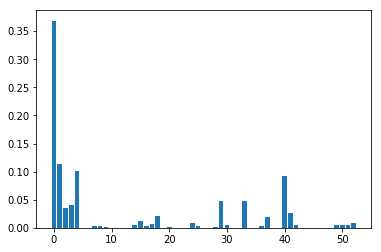

In [47]:
(328623+6177)/(328623+6177+18940+13275)
from matplotlib import pyplot
pyplot.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_)
pyplot.show()

In [53]:
#from xgboost import plot_tree
# plot single tree
#plot_tree(classifier)
#plt.show()
from sklearn.metrics import accuracy_score
from numpy import sort
from sklearn.feature_selection import SelectFromModel

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(classifier.feature_importances_)
print(thresholds)
'''
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(classifier, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
'''

Accuracy: 93.16%
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00142857 0.00142857 0.00142857 0.00285714 0.00285714 0.00285714
 0.00285714 0.00285714 0.00428571 0.00428571 0.00428571 0.00571429
 0.00571429 0.00571429 0.00714286 0.00857143 0.00857143 0.01142857
 0.01857143 0.02142857 0.02714286 0.03571429 0.04142857 0.04714286
 0.04714286 0.09285714 0.10142857 0.11428571 0.36857143]


'\nfor thresh in thresholds:\n\t# select features using threshold\n\tselection = SelectFromModel(classifier, threshold=thresh, prefit=True)\n\tselect_X_train = selection.transform(X_train)\n\t# train model\n\tselection_model = XGBClassifier()\n\tselection_model.fit(select_X_train, y_train)\n\t# eval model\n\tselect_X_test = selection.transform(X_test)\n\ty_pred = selection_model.predict(select_X_test)\n\tpredictions = [round(value) for value in y_pred]\n\taccuracy = accuracy_score(y_test, predictions)\n\tprint("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))\n'